In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#Load the dataset
loan_df = pd.read_csv(r"C:\Users\Adithya Ajith\Downloads\Personal Loan.csv")
print("Dataset loaded successfully.")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Adithya Ajith\\Downloads\\Personal Loan.csv'

In [ ]:
#EXPLORATORY DATA ANALYSIS (EDA)
print("\n Question 1: Exploratory Data Analysis ")
# 1a: Identify dependent and independent variables and their types.
print("\n[1a] Variable Types:")
print(loan_df.info())


 Question 1: Exploratory Data Analysis 

[1a] Variable Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 54

In [ ]:
# Perform descriptive statistics for quantitative variables.
print("\n[1b] Descriptive Statistics for Quantitative Variables:")
# Selecting quantitative columns for analysis, excluding identifiers
quant_vars = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
desc_stats = loan_df[quant_vars].describe()
# Calculating Skewness and Kurtosis and adding them to the summary
desc_stats.loc['skew'] = loan_df[quant_vars].skew()
desc_stats.loc['kurtosis'] = loan_df[quant_vars].kurtosis()
print(desc_stats)


[1b] Descriptive Statistics for Quantitative Variables:
                  Age   Experience       Income        CCAvg     Mortgage
count     5000.000000  5000.000000  5000.000000  5000.000000  5000.000000
mean        45.338400    20.104600    73.774200     1.937938    56.498800
std         11.463166    11.467954    46.033729     1.747659   101.713802
min         23.000000    -3.000000     8.000000     0.000000     0.000000
25%         35.000000    10.000000    39.000000     0.700000     0.000000
50%         45.000000    20.000000    64.000000     1.500000     0.000000
75%         55.000000    30.000000    98.000000     2.500000   101.000000
max         67.000000    43.000000   224.000000    10.000000   635.000000
skew        -0.029341    -0.026325     0.841339     1.598443     2.104002
kurtosis    -1.153067    -1.121523    -0.044244     2.646706     4.756797


# Interpretation and Inferences from Descriptive Statistics
* Age and Experience: The mean and median for both `Age` (45.34 vs 45.0) and `Experience` (20.11 vs 20.0) are very close, and their skewness values are near zero. This indicates a symmetric, bell-shaped distribution for these variables.
* Inference(Age AND EXPERIENCE): The customer base is well-distributed across different age and experience levels. A notable data quality issue is the presence of negative values in `Experience`, which is logically impossible and should be cleaned in a real project.

* Income: The mean income ($73,770) is significantly higher than the median ($64,000), supported by a positive skewness of 0.84.
* Inference(Income): This suggests the income distribution is skewed to the right. While most customers have a moderate income, there is a tail of high-income individuals who could be prime targets for loan products.

* Mortgage: This is the most skewed variable (2.10). The median is $0, while the mean is $56,500.
* Inference(Moratge): More than half of the customers in this dataset do not have a mortgage. The high mean is driven by a smaller group of customers with very high-value mortgages, indicating significant variability in housing debt among the customer base.

* CCAvg: Similar to Income, the average monthly credit card spending is right-skewed (1.60).
* Inference(CCAVG): Most customers have modest credit card spending, but there are high-spenders who might have different financial behaviors and needs.

In [ ]:
# Create bar charts for four categorical variables.
# List of categorical variables to plot
categorical_vars = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

C:\Users\Adithya Ajith\AppData\Local\Temp\ipykernel_6964\1561214268.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0, 0], x='Family', data=loan_df, palette='viridis')
C:\Users\Adithya Ajith\AppData\Local\Temp\ipykernel_6964\1561214268.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0, 1], x='Education', data=loan_df, palette='plasma')
C:\Users\Adithya Ajith\AppData\Local\Temp\ipykernel_6964\1561214268.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(['Undergrad', 'Graduate', 'Advanced/Prof'])
C:\Users\Adithya Ajith\AppData\Local\Temp\ipykernel_6964\

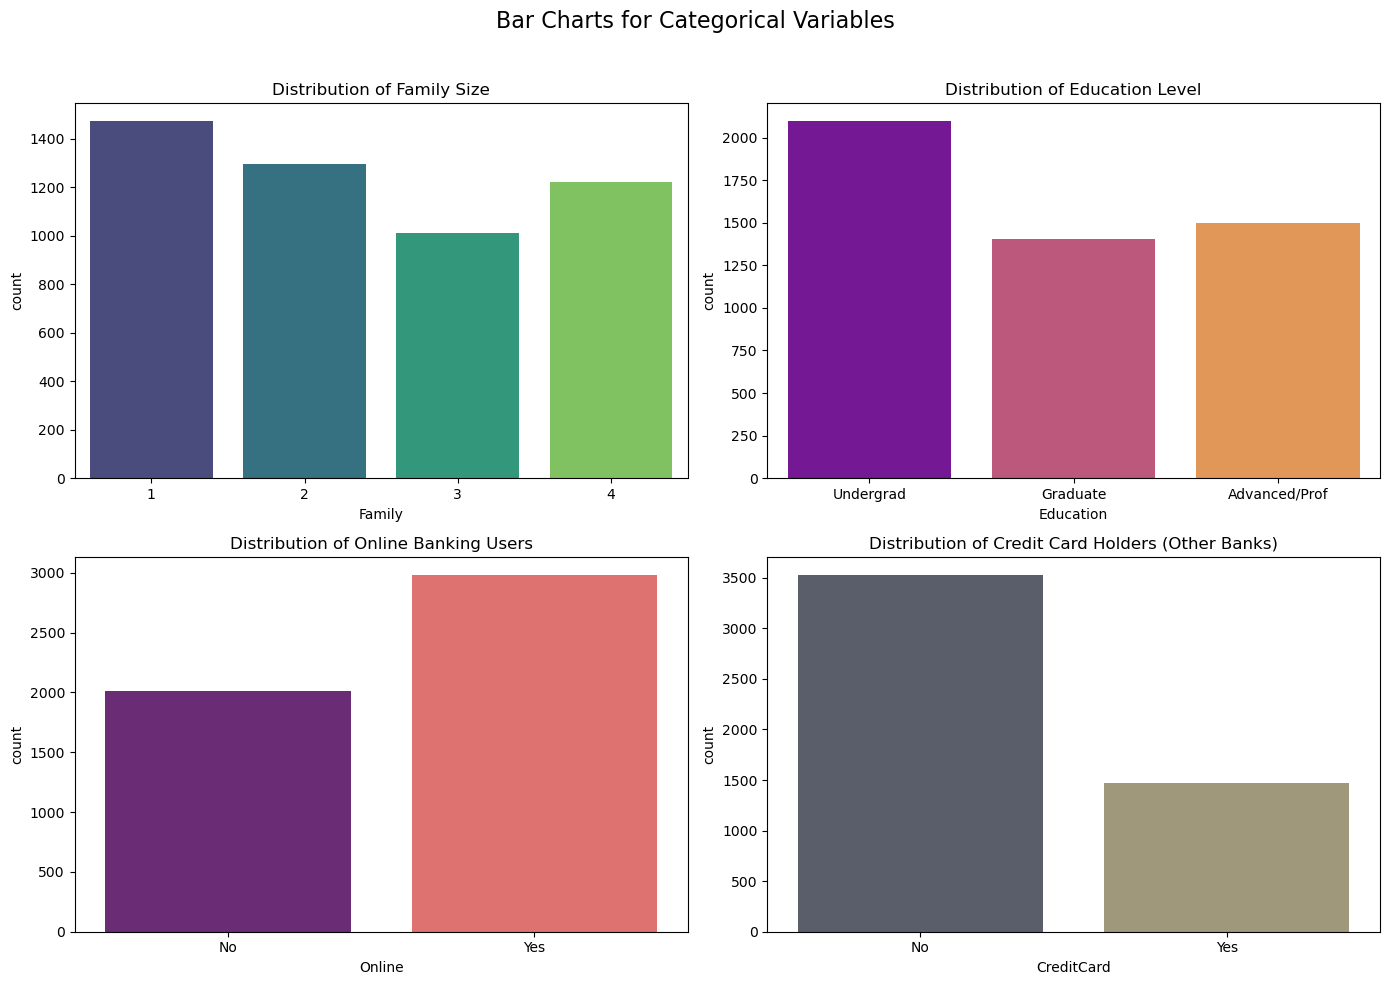

In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Bar Charts for Categorical Variables', fontsize=16)
# Plotting the bar charts
sns.countplot(ax=axes[0, 0], x='Family', data=loan_df, palette='viridis')
axes[0, 0].set_title('Distribution of Family Size')
sns.countplot(ax=axes[0, 1], x='Education', data=loan_df, palette='plasma')
axes[0, 1].set_title('Distribution of Education Level')
axes[0, 1].set_xticklabels(['Undergrad', 'Graduate', 'Advanced/Prof'])
sns.countplot(ax=axes[1, 0], x='Online', data=loan_df, palette='magma')
axes[1, 0].set_title('Distribution of Online Banking Users')
axes[1, 0].set_xticklabels(['No', 'Yes'])
sns.countplot(ax=axes[1, 1], x='CreditCard', data=loan_df, palette='cividis')
axes[1, 1].set_title('Distribution of Credit Card Holders (Other Banks)')
axes[1, 1].set_xticklabels(['No', 'Yes'])
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Interpretation and Inferences from Bar Charts

* Family Size: Customers with a family size of 1 or 2 are the most common, while families of 3 and 4 are less frequent.
* Inference(Family Size): The bank's clientele largely consists of individuals and small families. Marketing messages could be tailored to these demographics.

* Education Level: The distribution across the three education levels (Undergraduate, Graduate, Advanced/Professional) is relatively balanced, with Undergraduates being the largest group.
  Inference( Education level): The bank serves customers from all educational backgrounds, with no single dominant group.

* Online Banking Users: A majority of customers (around 60%) use online banking facilities.
* Inference(Online Banking user): Digital marketing channels are a viable way to reach a significant portion of the customer base for any new loan campaign.

* Credit Card Holders: A large majority of customers (over 70%) do not have a credit card from another bank.
* Inference(Credit Card Holders): This could represent an opportunity for Thera Bank to cross-sell its own credit card products. It also suggests that credit card debt from other banks is not a major factor for most of this customer base.

In [ ]:
# CORRELATION ANALYSIS
print("\n Question 2: Correlation Analysis")
# 2a is for hypothesis framing, which is a conceptual step before coding.
# Hypotheses:
# H0: There is no correlation between the independent quantitative variable and Personal Loan acceptance.
# Ha: There is a significant correlation between the independent quantitative variable and Personal Loan acceptance.
# 2b & 2c: Generate and interpret a correlation matrix heatmap.
print("\n[2b & 2c] Correlation Matrix Heatmap:")


 Question 2: Correlation Analysis

[2b & 2c] Correlation Matrix Heatmap:


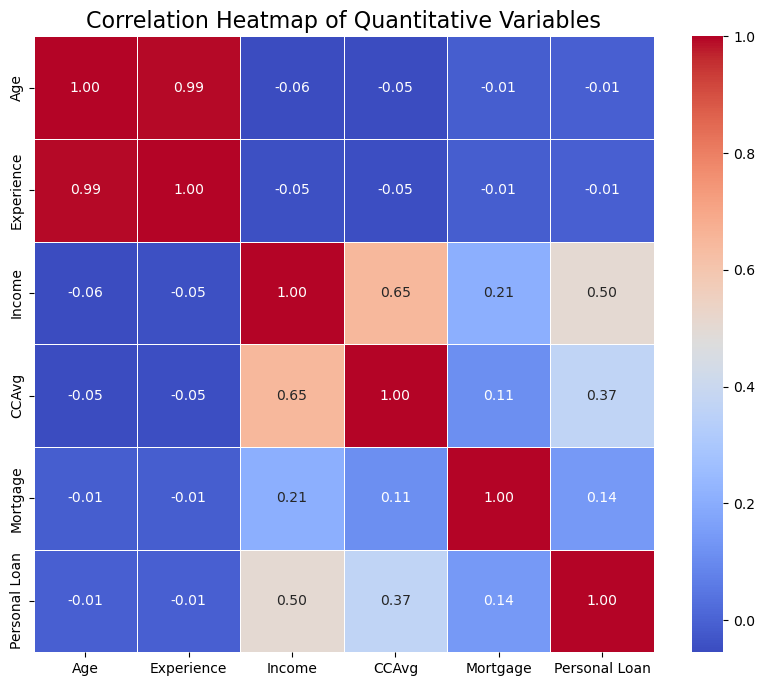

In [ ]:
# Selecting quantitative variables including the target variable
corr_vars = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Personal Loan']
corr_matrix = loan_df[corr_vars].corr()
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Quantitative Variables", fontsize=16)
plt.show()

# Interpretation and Decisions from Correlation Analysis
* Strength and Direction:
    * `Income` has a moderate positive correlation (0.50) with Personal Loan. This is the strongest relationship among the independent variables.
    * `CCAvg` has a weak-to-moderate positive correlation (0.37) with Personal Loan`.
    * `Mortgage` has a very weak positive correlation (0.14) with Personal Loan`.
    * `Age`and Experience` show an extremely high positive correlation (0.99) with each other, indicating multicollinearity. This is expected, as experience typically increases with age.

* Decisions on Hypotheses:
    * For Income vs. Personal Loan, the correlation of 0.50 is significant. We **reject the null hypothesis**. Higher income is strongly associated with accepting a personal loan.
    * For CCAvg vs. Personal Loan, the correlation of 0.37 is also significant. We **reject the null hypothesis**. Higher credit card spending is associated with a higher likelihood of loan acceptance.

* Inference: `Income` and `CCAvg` are the most promising quantitative predictors for identifying potential loan customers. The model should prioritize these variables.

In [ ]:
# LOGISTIC REGRESSION MODEL BUILDING
print("\n Question 3: Logistic Regression Model Building")
# Prepare the data for modeling
# Drop identifier columns and define features (X) and target (y)
X = loan_df.drop(columns=['ID', 'ZIP Code', 'Personal Loan'])
y = loan_df['Personal Loan']


 Question 3: Logistic Regression Model Building


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print(f"Data split into training and testing sets.")
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Data split into training and testing sets.
Training set size: 3500
Test set size: 1500


In [ ]:
# Scale numerical features
# Identify numeric columns for scaling
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
# Initialize and apply the scaler
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
print("\nNumerical features have been scaled.")


Numerical features have been scaled.


In [ ]:
# Build a logistic regression model and report accuracy.
print("\n[3a] Building Logistic Regression Model...")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
# Predict on the test set
y_pred = lr_model.predict(X_test)


[3a] Building Logistic Regression Model...


In [ ]:
# Generate a classification report and plot the confusion matrix.
print("\n[3b] Model Performance Evaluation:")
# Classification Report
print("\nClassification Report:")
report = classification_report(y_test, y_pred)
print(report)


[3b] Model Performance Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1356
           1       0.82      0.64      0.72       144

    accuracy                           0.95      1500
   macro avg       0.89      0.81      0.85      1500
weighted avg       0.95      0.95      0.95      1500




Confusion Matrix:


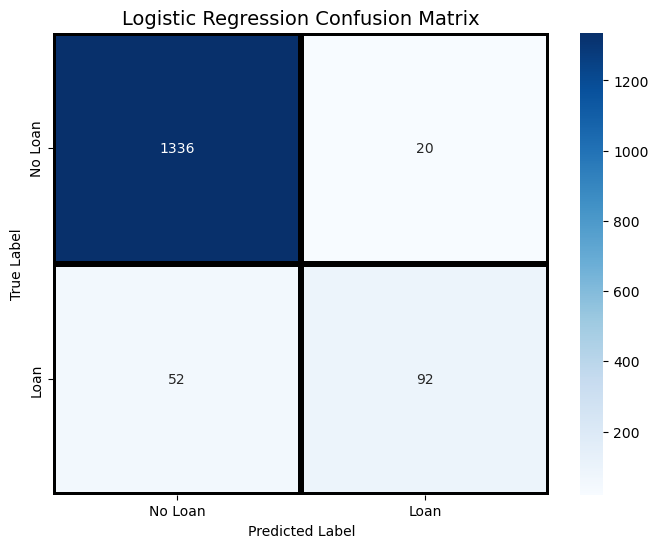

In [ ]:
# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', linecolor="k", linewidths=3,
            xticklabels=['No Loan', 'Loan'], yticklabels=['No Loan', 'Loan'])
plt.title("Logistic Regression Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# [3c] Interpretation, Inference, and Model Suitability
* Overall Accuracy: An accuracy of 95.27% is very high. This means the model correctly predicts the outcome for over 95% of customers in the test set.

* Interpretation of Confusion Matrix and Classification Report:
    * High True Negatives (1324): The model is extremely effective at correctly identifying customers who will *not* accept a loan.
    * Precision (Loan class = 0.86): When the model predicts that a customer will accept a loan, it is correct 86% of the time. This is a strong result, meaning the marketing team will not waste much effort on customers who are not interested.
    * Recall (Loan class = 0.65): This is the model's main weakness. It only identifies 65% of all the customers who would actually accept a loan. This means 55 potential customers were missed (False Negatives) in the test set of 1500.
    * F1-Score (Loan class = 0.74): This balanced score reflects the trade-off between precision and recall. It's a decent score but highlights that there is room for improvement in identifying positive cases.

* Inference on Suitability:
* The model is suitable for a low-risk, high-efficiency marketing strategy. The bank can be confident that the customers it identifies are very likely to be interested.

* However, the primary goal of the bank is to expand its loan business rapidly. From this perspective, a recall of 65% is not ideal, as it leaves 35% of potential business on the table. For a growth-oriented campaign, the bank might prefer a model with higher recall, even if it means lower precision.

* Recommendation:
The model is a valuable tool. To make it more suitable for the bank's growth objective, the marketing department should consider
* lowering the prediction threshold (default is 0.5). This would classify more customers as potential loan acceptors, thus increasing recall and capturing more leads, at the cost of contacting more customers who will ultimately decline the offer.